D://emcubes_140910//emcubes_np//aia_emcube_2014-09-10T17_32_02.57Z.npz


c:\Users\Lucien\Documents\School\Research\2023 - DEM Inversion\dem_venv\Lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 10 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
c:\Users\Lucien\Documents\School\Research\2023 - DEM Inversion\dem_venv\Lib\site-packages\astropy\units\quantity.py:666: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


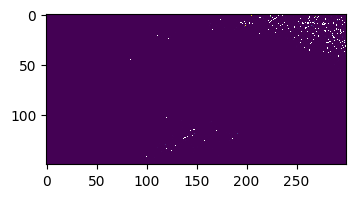

In [ ]:
from aiapy import calibrate
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import os

# relative uncertainty 

#  aiapy.calibrate.estimate_error(counts: Unit('DN / pix'), channel: Unit('Angstrom'), *, n_sample=1, include_preflight=False, include_eve=False, include_chianti=False, error_table, **kwargs)

# Data is DN/sec or DN. check 

path = "D://emcubes_140910//emcubes_np//"

filelist = os.listdir(path)
file = filelist[20]
filename = path + file
print(filename)

xregion = [350,650]
yregion = [380,530]

xstart  = xregion[0]
xend    = xregion[1]
ystart  = yregion[0]
yend    = yregion[1]

vars = np.load(filename)
data = (vars["datacube"])[:, ystart:yend, xstart:xend]


d94 = u.Quantity(data[0,:,:],'ct/pix')
channel94 = u.Quantity(94,'Angstrom')
e94 = aiapy.calibrate.estimate_error(d94,channel94)
rat94 = e94 / d94

data_width = xend - xstart
data_height = yend - ystart
height = [data_height, ]
width = [data_width, ]

px = 1/plt.rcParams['figure.dpi']  # pixel in inches

fig, axs = plt.subplots(1, 1,
        figsize=(sum(width)*px, sum(height)*px),
        gridspec_kw={'height_ratios':height})

plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)

axs.imshow(rat94)